## Notebook Summary - Modeling
---
#### This contents of this notebook includes:
#### **Model creation & testing on 3 specific models & Model Evaluation**
- LogisticRegression with/without BayesSearchCV
- RandomForestClassifier with BayesSearchCV
- PCA and Logistic Regression with GridSearchCV


In [39]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LassoCV, Lasso
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, f1_score
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import os
from sklearn import metrics
import pickle

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 2000


In [40]:
#read in data 
subs = subs = pd.read_csv('cleaned_datasets/subs_cleaned_forCVEC.csv')
X_train = pd.read_csv('cleaned_datasets/Modeling/X_train.csv')
X_test = pd.read_csv('cleaned_datasets/Modeling/X_test.csv')
y_train = pd.read_csv('cleaned_datasets/Modeling/y_train.csv')
y_test = pd.read_csv('cleaned_datasets/Modeling/y_test.csv')

In [41]:
X_train.head(1)

,Unnamed: 0,author,text,text_length,word_count,neg,pos,neu,compound,compound_cat,...,yul,zero,zinc,zinc 1,zinc oxide,zinc pyrithione,zit,zits,zone,zone dry
0,3493,unusualhammer,Just installed: Asian Beauty Shelving! Yay!,46,6,0.0,0.661,0.339,0.8309,positive,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
X_train.set_index('Unnamed: 0', inplace=True)
X_test.set_index('Unnamed: 0', inplace=True)
y_train.set_index('Unnamed: 0', inplace=True)
y_test.set_index('Unnamed: 0', inplace=True)

In [43]:
y_train.head(1)

,subreddit
Unnamed: 0,
3493,0


In [44]:
X_train.head(1)

,author,text,text_length,word_count,neg,pos,neu,compound,compound_cat,tokenized_text,...,yul,zero,zinc,zinc 1,zinc oxide,zinc pyrithione,zit,zits,zone,zone dry
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
3493,unusualhammer,Just installed: Asian Beauty Shelving! Yay!,46,6,0.0,0.661,0.339,0.8309,positive,"['just', 'installed', 'asian', 'beauty', 'shelving', 'yay']",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
print('original df:', subs.shape)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

original df: (12875, 8)
X_train: (9656, 5491)
y_train: (9656, 1)
X_test: (3219, 5491)
y_test: (3219, 1)


In [46]:
#dropping unnecessary columns before modeling
X_train.drop(columns=['text'], inplace=True)
X_test.drop(columns=['text], inplace=True)

## skincare_addiction - 1 / asian_beauty - 0

### Baseline Accuracy

In [47]:
y_train.value_counts(normalize=True)

subreddit
1            0.606462
0            0.393538
dtype: float64

### Scale data

In [48]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

## Modeling Datasets
Z_train, y_train Z_test, X_train

In [49]:
#import additional libraries
from sklearn.linear_model import LogisticRegression,Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, balanced_accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score


In [50]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

### 1. Logistic Regression

In [14]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(Z_train, y_train)

#got an error so I adjusted code - DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

LogisticRegression(max_iter=1000)

In [15]:
logreg.score(Z_train, y_train)

0.9992755872917314

In [16]:
logreg.score(Z_test, y_test)

0.840471756672874

In [17]:
balanced_accuracy_score(y_test, logreg.predict(Z_test))

0.8336329269754116

In [18]:
print('recall - train:', recall_score(y_train, logreg.predict(Z_train)))
print('precision - train', precision_score(y_train, logreg.predict(Z_train)))
print('recall - test:', recall_score(y_test, logreg.predict(Z_test)))
print('precision - test', precision_score(y_test, logreg.predict(Z_test)))

recall - train: 0.999146466370775
precision - train 0.9996584116140051
recall - test: 0.8658474142345111
precision - test 0.8703036541430778


In [213]:
f1_score(y_test, logreg.predict(Z_test))

0.8991596638655462

### balanced accuracy score is pretty close to the basic log reg accuracy score
### accuracy scores show that the model is overfit to training data

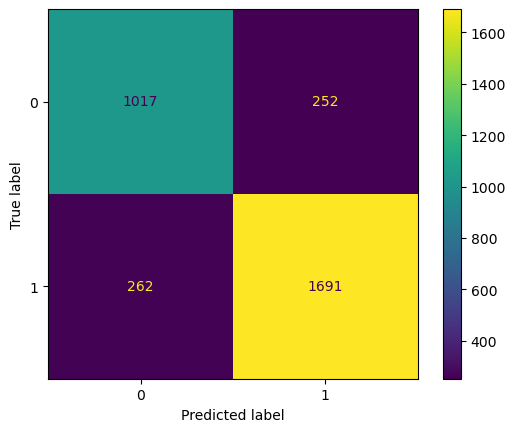

In [20]:
ConfusionMatrixDisplay.from_estimator(logreg, Z_test, y_test);

#### Since my data is imbalanced, I am addeding class_weight to my parameters.

In [21]:
logreg = LogisticRegression(max_iter = 1000, class_weight='balanced') #since I have an imbalanced dataset, trying strategies
logreg.fit(Z_train, y_train)
print(logreg.score(Z_train,y_train))
print(logreg.score(Z_test,y_test))

0.9992755872917314
0.84016139044072


**Note:** Tuning C parameter in LogisticRegression. In an ideal situation, I'd use GridSearchCV or BayesSearchCV, but due to size of df it's taking a really long time to search over

In [121]:
logreg = LogisticRegression(max_iter = 1000, class_weight='balanced', C=0.00004) #random C values I tried out
logreg.fit(Z_train, y_train)
print(logreg.score(Z_train,y_train))
print(logreg.score(Z_test,y_test))

0.9034461347407637
0.8792675356921167


In [180]:
logreg = LogisticRegression(max_iter = 1000, class_weight='balanced', C=0.000045)  #random C values I tried out
logreg.fit(Z_train, y_train)
print(logreg.score(Z_train,y_train))
print(logreg.score(Z_test,y_test))

0.9060333229845804
0.8808193668528864


### I used the information above to set more specific parameters for a BayesSearchCV with logreg

In [139]:
logreg = LogisticRegression(class_weight='balanced', max_iter = 1000)

pipe_logreg_params = {
    'C': np.linspace(0.00004,0.00006,50) 
}   

bs_logreg=BayesSearchCV(
    estimator=logreg,
    search_spaces=pipe_logreg_params,
    n_iter=50, 
    verbose=1,
    cv=5,
    n_jobs=-1
)

In [140]:
bs_logreg.fit(Z_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5,
              estimator=LogisticRegression(class_weight='balanced',
                                           max_iter=1000),
              n_jobs=-1,
              search_spaces={'C': array([4.00000000e-05, 4.04081633e-05, 4.08163265e-05, 4.12244898e-05,
       4.16326531e-05, 4.20408163e-05, 4.24489796e-05, 4.28571429e-05,
       4.32653061e-05, 4.36734694e-05, 4.40816327e-05, 4.44897959e-05,
       4.48979592e-05, 4.53061224e-05, 4.57142857e-05, 4....
       4.97959184e-05, 5.02040816e-05, 5.06122449e-05, 5.10204082e-05,
       5.14285714e-05, 5.18367347e-05, 5.22448980e-05, 5.26530612e-05,
       5.30612245e-05, 5.34693878e-05, 5.38775510e-05, 5.42857143e-05,
       5.46938776e-05, 5.51020408e-05, 5.55102041e-05, 5.59183673e-05,
       5.63265306e-05, 5.67346939e-05, 5.71428571e-05, 5.75510204e-05,
       5.79591837e-05, 5.83673469e-05, 5.87755102e-05, 5.91836735e-05,
       5.95918367e-05, 6.00000000e-05])},
              verbose=1)

In [145]:
#commenting out so I don't run again
# pickle.dump(bs_logreg, open('bs_logreg.pkl', 'wb'))

In [146]:
# Loading model to compare the results
bs_logreg = pickle.load(open('pickles/bs_logreg.pkl','rb'))

In [147]:
bs_logreg.best_params_

OrderedDict([('C', 6e-05)])

In [148]:
bs_logreg.score(Z_train, y_train)

0.9142088378350409

In [149]:
bs_logreg.score(Z_test, y_test)

0.8836126629422719

In [150]:
balanced_accuracy_score(y_test, bs_logreg.predict(Z_test))

0.8842606210485414

In [151]:
print('recall - train:', recall_score(y_train, bs_logreg.predict(Z_train)))
print('precision - train', precision_score(y_train, bs_logreg.predict(Z_train)))
print('recall - test:', recall_score(y_test, bs_logreg.predict(Z_test)))
print('precision - test', precision_score(y_test, bs_logreg.predict(Z_test)))

recall - train: 0.9066234209627859
precision - train 0.9495798319327731
recall - test: 0.8812083973374296
precision - test 0.9232832618025751


In [215]:
f1_score(y_test, bs_logreg.predict(Z_test))

0.9017553052135184

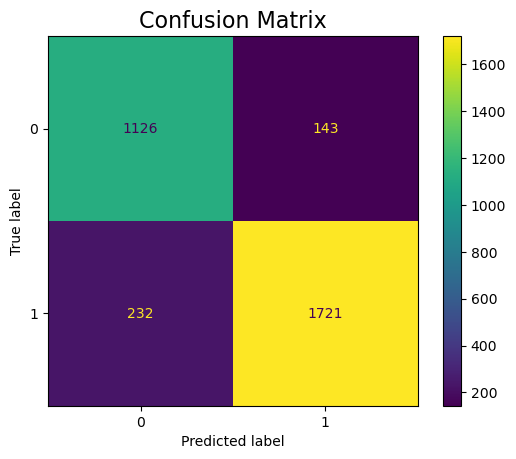

In [308]:
ConfusionMatrixDisplay.from_estimator(bs_logreg, Z_test, y_test);
plt.title('Confusion Matrix', size=16)
plt.savefig('plots/cm_bs_bs-logreg.png',dpi=300, bbox_inches = "tight")

### Grabbing coeffients

In [183]:
bs_logreg.best_estimator_.coef_

array([[ 0.00381106,  0.00525913,  0.01832551, ...,  0.00370449,
        -0.00183592,  0.00343896]])

In [188]:
logreg_coefs = pd.DataFrame(bs_logreg.best_estimator_.coef_, columns=X_train.columns).T

In [202]:
logreg_coefs

,0
text_length,0.003811
word_count,0.005259
neg,0.018326
pos,-0.017784
neu,0.006083
...,...
zinc pyrithione,0.002363
zit,0.002769
zone,0.003704
zone dry,-0.001836


In [205]:
logreg_coefs.sort_values(by=0, ascending=False)[:20]

,0
acne,0.037862
product question,0.037053
skin concern,0.036490
concern,0.036086
help,0.033877
skin,0.033743
routine help,0.030300
misc,0.026669
question,0.025523
routine,0.024898


### The coefficents represent the log odds so they need to be exponentiated to get the odds of success since it's a classification model. Here, a unit increase in 'acne' word in the data means that the odds of success increases by 1.04.

In [207]:
#create a column that exponentiates the coefs from the logreg
logreg_coefs['odds_of_success'] = [np.exp(v) for v in logreg_coefs[0]]

In [219]:
logreg_coefs.sort_values(by=0, ascending=False)[:20]

,0,odds_of_success
acne,0.037862,1.038587
product question,0.037053,1.037749
skin concern,0.036490,1.037164
concern,0.036086,1.036745
help,0.033877,1.034458
skin,0.033743,1.034319
routine help,0.030300,1.030764
misc,0.026669,1.027028
question,0.025523,1.025852
routine,0.024898,1.025211


In [222]:
df = logreg_coefs.sort_values(by=0, ascending=False)
df.to_csv('cleaned_datasets/model_coef.csv')
# df.rename({0: 'coef'}, inplace=True)
# df.reset_index(inplace=True)

---

### 2. Random Forest Classifier

In [22]:
#instantiate Random Forest Classifier
rf = RandomForestClassifier()

In [23]:
#pipe params
rf_params = {
    'n_estimators': Integer(100,400),  
    'max_features': ['sqrt', 'log2', None],     
    'max_depth': Integer(1, 32),
    'min_samples_leaf': Real(0.1, 0.5)}

#Instantiate BayesSearchCV
bs_rf = BayesSearchCV(
    estimator = rf,
    search_spaces = rf_params,
    scoring = 'f1_weighted',
    n_iter = 30,  #50
    verbose = 1,
    cv = 3,  #5
    n_jobs=-1
)

#### Originally ran with 5 cvs and 50 iterations which took about 8.5 hrs. Accidently repickled over that model & had to re-run :( :(, but due to time limitations, I adjusted the parameters.

In [24]:
#commenting out so it doesn't rerun
bs_rf.fit(Z_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

/Users/debbiesim/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits


/Users/debbiesim/opt/anaconda3/envs/dsi/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


BayesSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30, n_jobs=-1,
              scoring='f1_weighted',
              search_spaces={'max_depth': Integer(low=1, high=32, prior='uniform', transform='normalize'),
                             'max_features': ['sqrt', 'log2', None],
                             'min_samples_leaf': Real(low=0.1, high=0.5, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=400, prior='uniform', transform='normalize')},
              verbose=1)

In [25]:
# #commenting out so I don't run again
# pickle.dump(bs_rf, open('bs_rf.pkl', 'wb'))

In [32]:
# Loading model to compare the results
bs_rf = pickle.load(open('pickles/bs_rf.pkl','rb'))

In [33]:
bs_rf.best_estimator_

RandomForestClassifier(max_depth=1, max_features=None, min_samples_leaf=0.1,
                       n_estimators=400)

In [34]:
bs_rf.best_params_

OrderedDict([('max_depth', 1),
             ('max_features', None),
             ('min_samples_leaf', 0.1),
             ('n_estimators', 400)])

In [35]:
bs_rf.score(Z_train, y_train)

0.7215338013035743

In [36]:
bs_rf.score(Z_test, y_test)

0.7321973109133105

In [37]:
# model is not overfit anymore! It's performing similarly on test and train

In [306]:
print('recall - train:', recall_score(y_train, bs_rf.predict(Z_train)))
print('precision - train', precision_score(y_train, bs_rf.predict(Z_train)))
print('recall - test:', recall_score(y_test, bs_rf.predict(Z_test)))
print('precision - test', precision_score(y_test, bs_rf.predict(Z_test)))

recall - train: 0.7284055991806078
precision - train 0.7917981072555205
recall - test: 0.7275985663082437
precision - test 0.8073863636363636


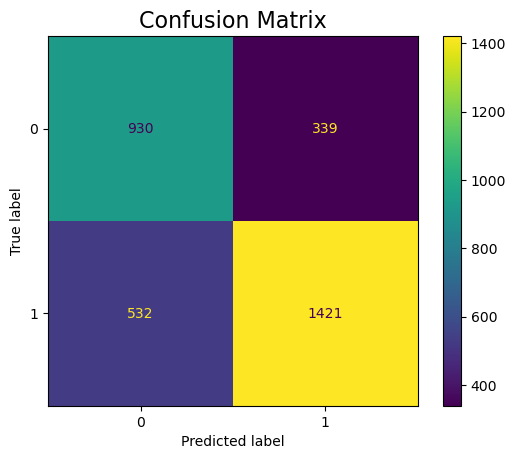

In [307]:
# plt.savefig('plots/cm_gspca2.png',dpi=300, bbox_inches = "tight")
ConfusionMatrixDisplay.from_estimator(bs_rf, Z_test, y_test);
plt.title('Confusion Matrix', size=16)
plt.savefig('plots/cm_bs_bs-rf.png',dpi=300, bbox_inches = "tight")

---

### 3. PCA

Principal Component Logistic Regression Performance

In [38]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [69]:
# Instantiate PCA with components
pca = PCA()  
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# Fit PCA to training data.
pca_pipe = Pipeline([('pca', pca),
                    ('logreg', LogisticRegression())])

pipe_params = {
    'pca__n_components': [250, 295, 300, 350, 500],
    'logreg__C': [0.001, 0.01, 0.1]   
}

gs = GridSearchCV(
    pca_pipe,  #estimator
    param_grid = pipe_params,  #parameters
    cv = 5,     #cross val folds
    n_jobs=-1
)

In [70]:
gs.fit(Z_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.001, 0.01, 0.1],
                         'pca__n_components': [250, 295, 300, 350, 500]})

In [71]:
# #commenting out so I don't run again
# pickle.dump(gs, open('gs_PCA.pkl', 'wb'))

In [72]:
# Loading model to compare the results
gs_pca= pickle.load(open('pickles/gs_pca.pkl','rb'))

In [73]:
gs_pca.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=500)),
                ('logreg', LogisticRegression(C=0.001))])

In [74]:
gs_pca.best_params_

{'logreg__C': 0.001, 'pca__n_components': 500}

In [75]:
gs_pca.score(Z_train, y_train)

0.8929938942357446

In [76]:
gs_pca.score(Z_test, y_test)

0.8798882681564246

In [85]:
# Instantiate PCA with components or % explained my variance.
pca = PCA(n_components=494)  #395-400

# Fit PCA to training data.
pca_pipe = Pipeline([('pca', pca),
                    ('model', LogisticRegression(C = 0.01, max_iter=1000, class_weight='balanced'))])

In [86]:
# Fit on Z_train.
pca_pipe.fit(Z_train, y_train)

# Score on training and testing sets.
print(pca_pipe.score(Z_train, y_train))
print(pca_pipe.score(Z_test, y_test))

0.8939252820035186
0.8702669149596524


In [153]:
balanced_accuracy_score(y_test, pca_pipe.predict(Z_test))

0.8686980931318611

In [154]:
print('recall - train:', recall_score(y_train, pca_pipe.predict(Z_train)))
print('precision - train', precision_score(y_train, pca_pipe.predict(Z_train)))
print('recall - test:', recall_score(y_test, pca_pipe.predict(Z_test)))
print('precision - test', precision_score(y_test, pca_pipe.predict(Z_test)))

recall - train: 0.889894161829976
precision - train 0.9320579295548006
recall - test: 0.8760880696364567
precision - test 0.9067302596714362


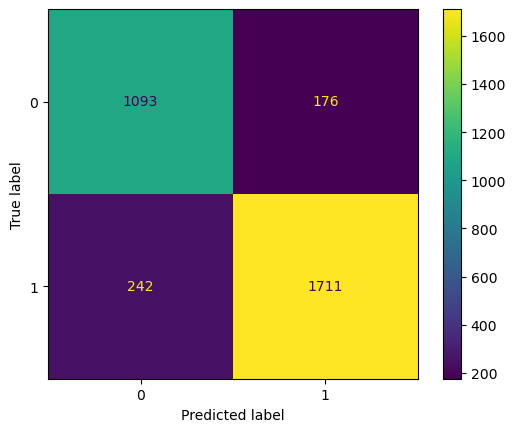

In [155]:
ConfusionMatrixDisplay.from_estimator(pca_pipe, Z_test, y_test);

In [175]:
# Instantiate PCA with components
pca = PCA()  
logreg = LogisticRegression(C=6e-05,class_weight='balanced', max_iter=1000)

# Fit PCA to training data.
pca_pipe = Pipeline([('pca', pca),
                    ('logreg', LogisticRegression())])

pipe_params = {
    'pca__n_components': [550, 600, 650],   
}

gs_pca2 = GridSearchCV(
    pca_pipe,  #estimator
    param_grid = pipe_params,  #parameters
    cv = 5,     #cross val folds
    n_jobs=-1
)

In [176]:
gs_pca2.fit(Z_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('logreg', LogisticRegression())]),
             n_jobs=-1, param_grid={'pca__n_components': [550, 600, 650]})

In [177]:
gs_pca2.best_params_

{'pca__n_components': 600}

In [178]:
gs_pca2.score(Z_train, y_train)

0.9035496222705164

In [179]:
gs_pca2.score(Z_test, y_test)

0.8786468032278089

In [217]:
f1_score(y_test, gs_pca2.predict(Z_test))

0.9009875917953912

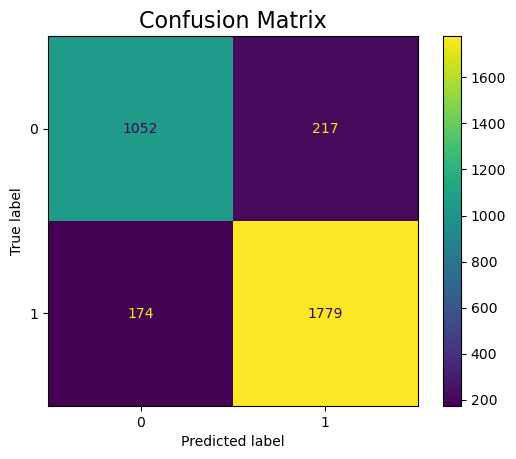

In [304]:
ConfusionMatrixDisplay.from_estimator(gs_pca2, Z_test, y_test)
plt.title('Confusion Matrix', size=16);

plt.savefig('plots/cm_gspca2.png',dpi=300, bbox_inches = "tight")

---
## Model Evaluation

#### Models I ran:
- LogisticRegression with/without BayesSearchCV ★
- RandomForestClassifier with BayesSearchCV
- PCA and Logistic Regression with GridSearchCV ★

Of the models I ran, two models performed similarly based on my chosen metric which is accuracy score. Both the LogisticRegression with BayesSearchCV and LogisticRegression with PCA and GridSearchCV performed similarly well.

The first model I created and test was the basic Logistic Regression model. When I ran it with default parameters it was overfit to the training data (0.99 accuracy score on train and 0.84 accuracy score on test which is evidence of overfitting). I then used a BayesSearchCV to search for optimal parameters for the RandomForestClassifier model. At the time of comparison, the Random Forest was a better model than basic LogisticRegression even though accuracy, recall, and precision were lower because it performed similarly on train and test. It was not overfit like the logreg. 

I then decided to go back to my Linear Regression, but combine it with PCA (principal component analysis) because I have a lot of features in my dataset. Since my dataset was imbalanced, I also added the class_weight = ‘balanced’ parameter to my LogisticRegression. I used gridsearchcv mainly because my computer was not happy with me using the BayesSearchCV. My scores were much better than my RandomForest model. I think PCA with BayesSearchCV could potentially be a better model, but due to my computer not being able to handle it, I wasn't able to do a thorough search of the parameters.


Finally, I decided to go back and tune my basic logistic regression without PCA, but with the class_weight = balanced parameter. This model performed similarly to the one with PCA, but it does have a higher precision score. My metric was accuracy, but if  precision was my goal (minimiziing false positives - predicted Skincare addiction, but got asian beauty), I’d say go with this model.